In [801]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generating the dataset {-}

In [75]:
def generate(k):
    
    # Initializing the constants. m here represents the number of features and not the number of datapoints.
    m, mu, sigma_sq = 20, 0, 0.1
    X, Y = np.zeros([k, m+1]), np.zeros([k,])
    
    for j in range(k):
        x_val, y_val = [], []
        
        # The first term is the bias
        x_val.append(1)
        
        def generate_x():
            for i in range(m):
                if i < 11 or i > 15:
                    x_val.append(np.random.normal(mu, 1))
                elif i == 11:
                    x_val.append(x_val[1] + x_val[2] + np.random.normal(mu, sigma_sq))
                elif i == 12:
                    x_val.append(x_val[3] + x_val[4] + np.random.normal(mu, sigma_sq))
                elif i == 13:
                    x_val.append(x_val[5] + x_val[6] + np.random.normal(mu, sigma_sq))
                elif i == 14:
                    x_val.append((0.1 * x_val[7]) + np.random.normal(mu, sigma_sq))
                elif i == 15:
                    x_val.append((2 * x_val[2]) - 10 + np.random.normal(mu, sigma_sq))
            X[j] = np.array(x_val)


        def generate_y(x):
            a = [0.6**(i) for i in range(1,11)]
            Y[j] = 10 + np.dot(a, x[1:11]) + np.random.normal(mu, sigma_sq)
            
        generate_x()
        generate_y(x_val)
        
    return X, Y

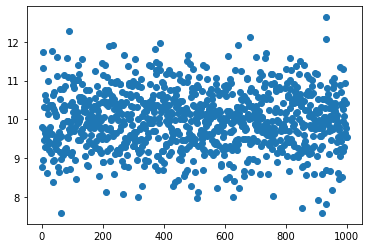

In [76]:
# The parameter passed here is the 'm', i.e., number of datapoints.
m_datapoints = 1000
lr_x, lr_y = generate(m_datapoints)
plt.scatter([p+1 for p in range(m_datapoints)], lr_y)
plt.show()

# Calculating the true bias and weights {-}

In [574]:
model_true_bias = 10
model_true_weights = [(0.6)**i for i in range(1, 11)]
for i in range(11, 21):
    model_true_weights.append(0)
print("True Bias is {}".format(model_true_bias))
print("True Weights are {}".format(model_true_weights))

True Bias is 10
True Weights are [0.6, 0.36, 0.21599999999999997, 0.1296, 0.07775999999999998, 0.04665599999999999, 0.027993599999999993, 0.016796159999999994, 0.010077695999999997, 0.006046617599999997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Least Squares Regression model

In [594]:
class Linear_Regression:
    
    def naive_linear_regression(self, x, y):
        # Getting the number of datapoints and number of features.
        m, k = x.shape        
        x_transpose = np.transpose(x)
        
        # Applying the linear regression model to generate weights.
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(x_transpose, x)), x_transpose), y)
        return self.weights
    
    # This function is used to predict using the existing weights.
    def predict(self, x, weight):
        return np.dot(x, weight)

## Solving Least Squares method and finding the weights and bias that gives minimum error

[ 9.64784994e+00  5.89809536e-01  4.22090297e-01  2.42802755e-01
  1.52244502e-01  8.17512760e-02  5.53405417e-02  3.25972746e-02
  1.51503524e-02  1.48766725e-02  7.41420117e-03 -2.07038629e-03
  8.46619246e-03 -2.31083317e-02 -9.78089791e-03 -2.61606608e-02
 -3.54476801e-02  4.81823274e-03 -7.13913156e-03  2.98268398e-03
  5.18583515e-03]


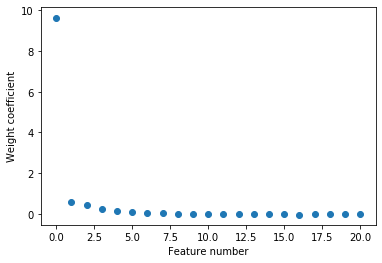

In [595]:
# Training a model and getting the weights.
m_datapoints = 1000
lr_x, lr_y = generate(m_datapoints)
lr = Linear_Regression()
lr_weights = lr.naive_linear_regression(lr_x, lr_y)
print(lr_weights)
plt.scatter([i for i in range(21)], lr_weights)
plt.xlabel("Feature number")
plt.ylabel("Weight coefficient")
plt.show()

## Comparison with true weights and bias

From our true model, we can see that the true bias value is 10. <br>
Also, we can see that the true weights from 1 to 10 would be $(0.6)^i$ and the remaining would have 0 as their weights.

In [618]:
print("The difference between true bias and the bias from the model is {}".format(abs(model_true_bias-lr_weights[0])))
print("The mean of the difference between true weights \
and the weights from the model is {}".format(np.mean(abs(model_true_weights-lr_weights[1:]))))

The difference between true bias and the bias from the model is 0.3521500597066023
The mean of the difference between true weights and the weights from the model is 0.013598995561117943


## Most and least significant features

In [597]:
print("Most significant feature is {}".format(np.argmax(lr_weights[1:])+1))
print("Least significant feature is {}".format(np.argmin(lr_weights[1:])+1))

count = 0
for check_weight in lr_weights:
    if check_weight == 0:
        count += 1
print("The features that are pruned are {}".format(count))

Most significant feature is 1
Least significant feature is 16
The features that are pruned are 0


The least squares method did not prune any of the features. However, it had features whose coefficients were very low.

## Finding the training error {-}

In [598]:
prediction = lr.predict(lr_x, lr_weights)
mse = (np.square(prediction - lr_y)).mean()
print("Mean Squared training error is {}".format(mse))

Mean Squared training error is 0.009731491854093643


## Testing our model on new data

In [599]:
# Testing the model with 100k datapoints
test_x, test_y = generate(100000)
predict1 = lr.predict(test_x, lr_weights)
mse_testing = (np.square(predict1 - test_y)).mean()
print("Testing error is {}".format(mse_testing))

Testing error is 0.010157665763282633


# Ridge Regerssion model

In [605]:
class Ridge_Regression:
    def __init__(self, lam):
        # Passing the lambda value
        self.lam = lam
    
    def ridge_regression(self, x, y):
        m, k = x.shape
        identity = np.identity(k)    
        x_transpose = np.transpose(x)
        
        # Applying the ridge regression model to generate weights.
        self.weights = np.dot(np.linalg.inv(np.dot(x_transpose, x) + (self.lam * identity)), np.dot(x_transpose, y))
        return self.weights
    
    def predict_ridge(self, x, weight):
        return np.dot(x, weight)

## Training the Ridge Regression model

In [606]:
# Lambda value passed for testing is 0.001

train_rr_x, train_rr_y = generate(1000)
rr = Ridge_Regression(0.001)
rr_weights = rr.ridge_regression(train_rr_x, train_rr_y)
print(rr_weights)

[ 1.01845517e+01  6.39230239e-01  3.61956470e-01  2.06009093e-01
  1.10606703e-01  7.72630714e-02  4.81755488e-02  3.05899421e-02
  1.92827036e-02  1.36457215e-02  1.04483826e-02  1.98047930e-03
 -3.72806103e-02  1.44559160e-02 -5.72003471e-03 -5.10737356e-02
  1.89389491e-02 -1.62445807e-03 -2.72256548e-04 -4.66237762e-03
 -2.11650365e-03]


## Testing the Ridge Regression model on a large dataset

In [607]:
test_rr_x, test_rr_y = generate(100000)
ridge_testing = rr.predict_ridge(test_rr_x, rr_weights)
ridge_testing_mse = (np.square(ridge_testing - test_rr_y)).mean()
print("Testing error for ridge regression is {}".format(ridge_testing_mse))

Testing error for ridge regression is 0.010268631914154742


## Finding error as a function of different lambda values

The optimal lambda found out was : 0.00014000000000000001.


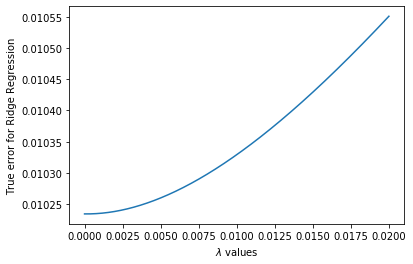

In [609]:
lambda_value = 0.
error_list, ridge_lambda_list = [], []
x_train_ridge, y_train_ridge = generate(1000)
x_test_ridge, y_test_ridge = generate(100000)
min_error, min_lambda = float('inf'), -1

while lambda_value <= 0.02:
    lambda_rr = Ridge_Regression(lambda_value)
    lambda_rr_weights = lambda_rr.ridge_regression(x_train_ridge, y_train_ridge)
    ridge_pred = rr.predict_ridge(x_test_ridge, lambda_rr_weights)
    error = (np.square(ridge_pred - y_test_ridge)).mean()
    error_list.append(error)
    if error < min_error:
        min_error = error
        min_lambda = lambda_value
    ridge_lambda_list.append(lambda_value)
    lambda_value += 0.00001

print("The optimal lambda found out was : {}.".format(min_lambda))
plt.plot(ridge_lambda_list, error_list)
plt.xlabel("$\lambda$ values")
plt.ylabel("True error for Ridge Regression")
plt.show()

## Plotting the weights {-}

[ 1.01845517e+01  6.39230239e-01  3.61956470e-01  2.06009093e-01
  1.10606703e-01  7.72630714e-02  4.81755488e-02  3.05899421e-02
  1.92827036e-02  1.36457215e-02  1.04483826e-02  1.98047930e-03
 -3.72806103e-02  1.44559160e-02 -5.72003471e-03 -5.10737356e-02
  1.89389491e-02 -1.62445807e-03 -2.72256548e-04 -4.66237762e-03
 -2.11650365e-03]


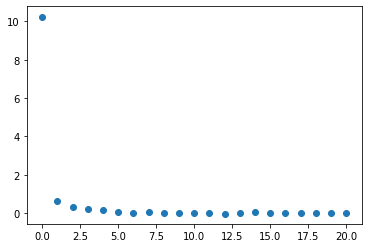

In [611]:
tr_rr_x, tr_rr_y = generate(1000)
rr_min_lambda = Ridge_Regression(min_lambda)
rr_lambda_weights = rr.ridge_regression(tr_rr_x, tr_rr_y)
print(rr_weights)
plt.scatter([i for i in range(21)], rr_lambda_weights)
plt.show()

## Comparison with true weights and bias for minimum error lambda weights

In [617]:
print("The difference between true bias and the bias from the model is \
{}".format(abs(model_true_bias - rr_lambda_weights[0])))
print("The mean of the difference between true weights \
and the weights from the model is {}".format(np.mean(abs(model_true_weights - rr_lambda_weights[1:]))))

The difference between true bias and the bias from the model is 0.25839067267695803
The mean of the difference between true weights and the weights from the model is 0.015044283037300817


## Most and least significant features for Ridge Regression

In [621]:
print("Most significant feature is {}".format(np.argmax(rr_lambda_weights[1:])+1))
print("Least significant feature is {}".format(np.argmin(rr_lambda_weights[1:])+1))

count = 0
for check_weight in rr_lambda_weights:
    if check_weight == 0:
        count += 1
print("The features that are pruned are {}".format(count))

Most significant feature is 1
Least significant feature is 12
The features that are pruned are 0


There were no features pruned for Ridge Regression as well.

## Comparing True errors of Least Squares method with Ridge Regression

In [624]:
print("The difference between the error in least squares and ridge regression with optimal lambda value at {} is {} \
".format(min_lambda, mse_testing-min_error))

The difference between the error in least squares and ridge regression with optimal lambda value at 0.00014000000000000001 is -7.652259368729104e-05 


This result suggests that the error in naive least squares was a bit lower than Ridge Regression

### To see what happens when we increase the lambda to a high value. {-}

[ 3.53321091e-01 -2.64012359e-01  1.24804893e+00  1.05236130e-01
  1.04559371e-02  3.72347186e-02  7.07449904e-03  2.79688228e-02
  1.57025652e-02  4.49639321e-03  4.73854819e-03  4.37139897e-03
  9.02774889e-01  1.05122643e-01  4.11236118e-02 -4.56195493e-03
 -9.60492563e-01 -1.23034156e-03 -2.69451331e-03 -3.00512237e-04
 -2.44719563e-04]


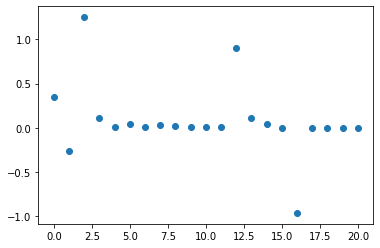

In [625]:
increasing_rr = Ridge_Regression(100)
increased_rr_weights = increasing_rr.ridge_regression(x_train_ridge, y_train_ridge)
print(increased_rr_weights)
plt.scatter([i for i in range(21)], increased_rr_weights)
plt.show()

As we can see, increasing the value of lambda to a high value forces a lot of features to have a really low weight. However, it does make any weight 0.

# Lasso Regression

In [744]:
class Lasso_Regression:
    
    def coordinate_descent_lasso(self, x, y, lamda = .01, num_iters=100):
        m, n = x.shape
        weights = np.ones((n, 1))
        
        for _ in range(num_iters): 
            for i in range(n):

                current_datapoint = x[:, i].reshape(-1, 1)
                current_datapoint_transpose = np.transpose(current_datapoint)
                y_prediction = np.dot(x, weights)
                prediction_difference = y - y_prediction
                denominator = np.dot(current_datapoint_transpose, current_datapoint)
                first_term = np.dot(current_datapoint_transpose, prediction_difference)
                numerator = -first_term + (lamda/2)
                final_value = numerator / denominator
                
                if i == 0:
                    weights[i] += prediction_difference.mean()
                else:
                    if (-first_term + (lamda/2)) / denominator < weights[i]:
                        weights[i] += ((first_term - (lamda/2)) / denominator)[0][0]
                    elif weights[i] < (-first_term - (lamda/2)) / denominator:
                        weights[i] += ((first_term + (lamda/2)) / denominator)[0][0]
                    else:
                        weights[i] = 0

        return weights.flatten().reshape(-1, 1)
    
    def predict_lasso(self, x, weight):
        return np.matmul(x, weight)

## Plotting weights of features vs lambda values and showing as lambda value increases, the weights get pruned

The final weight at lambda = 4900 is [[9.98201208]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


(-245.0, 5145.0, -2.4776108538171564, 1.1730776942214858)

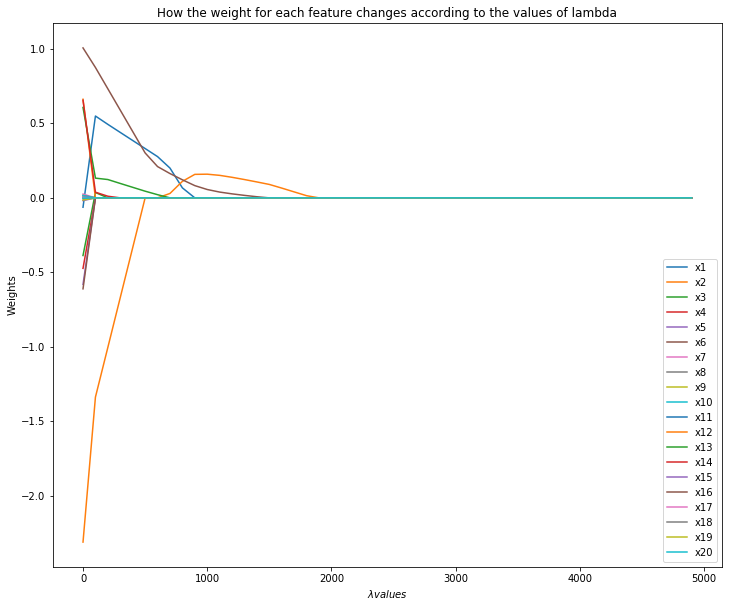

In [741]:
x_train_lasso, y_train_lasso = generate(1000)
y_train_lasso = y_train_lasso.reshape(-1, 1)

# Initialize variables
weight_list = list()
lamda = 0
lamda_array = []
while lamda < 5000:
    lamda_array.append(lamda)
    lamda += 100
    
# Error terms initialization
error_list_lasso, min_error, min_lambda = [], float('inf'), 0

# Initialization for min error weights
min_error_weights = None
    
#Run lasso regression for each lambda
for l in lamda_array:
    lassor = Lasso_Regression()
    current_weight = lassor.coordinate_descent_lasso(x_train_lasso, y_train_lasso, lamda = l, num_iters = 100)
    weight_list.append(current_weight)

weight_lasso = np.stack(weight_list).T
n, _ = weight_lasso[0].shape
plt.figure(figsize = (12,10))

print("The final weight at lambda = {} is {}".format(l, weight_list[-1]))
labels = ["x{}".format(i) for i in range(n)]
for i in range(1, n):
    plt.plot(lamda_array, weight_lasso[0][i], label = labels[i])

plt.xlabel('$\\lambda values$')
plt.ylabel('Weights')
plt.title('How the weight for each feature changes according to the values of lambda')
plt.legend()
plt.axis('tight')

# Lasso Regression Experiments

## Finding true error vs lambda

The lambda value with minimum error is 50


Text(0.5, 1.0, '$\\lambda$ vs True Error')

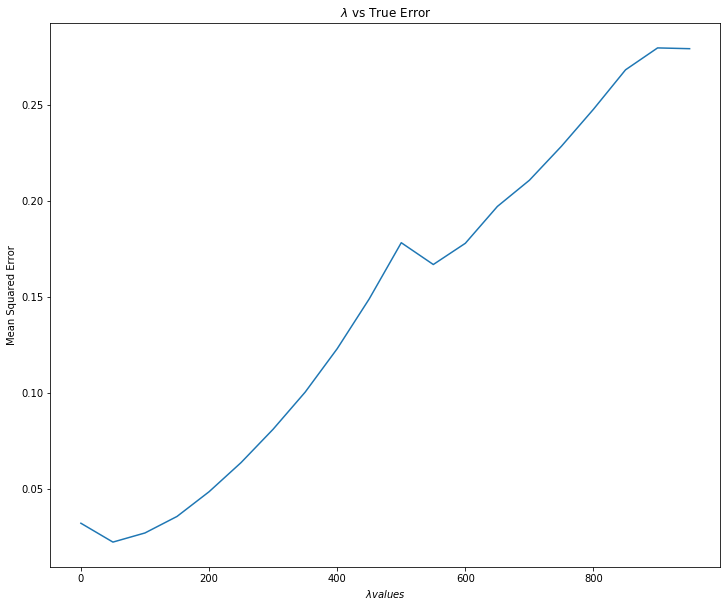

In [797]:
x_train_lasso, y_train_lasso = generate(1000)
y_train_lasso = y_train_lasso.reshape(-1, 1)
x_test_lasso, y_test_lasso = generate(10000)
y_test_lasso = y_test_lasso.reshape(-1, 1)

# Initialize variables
weight_list = list()
lamda = 0
lamda_array = []
# while lamda < 50:
#     lamda_array.append(lamda)
#     lamda += 1
while lamda < 1000:
    lamda_array.append(lamda)
    lamda += 50
    
# Error terms initialization
error_list_lasso, min_error, min_lambda = [], float('inf'), 0

# Initialization for min error weights
min_error_weights = None
    
#Run lasso regression for each lambda
for l in lamda_array:
    lassor = Lasso_Regression()
    current_weight = lassor.coordinate_descent_lasso(x_train_lasso, y_train_lasso, lamda = l, num_iters = 100)
    weight_list.append(current_weight)
    lasso_prediction = lassor.predict_lasso(x_test_lasso, current_weight).reshape(-1, 1)
    error = (np.square(lasso_prediction - y_test_lasso)).mean()
    error_list_lasso.append(error)
    if error < min_error:
        min_error = error
        min_lambda = l
        min_error_weights = current_weight

print("The lambda value with minimum error is {}".format(min_lambda))

plt.figure(figsize = (12,10))
plt.plot(lamda_array, error_list_lasso)
plt.xlabel('$\\lambda values$')
plt.ylabel('Mean Squared Error')
plt.title('$\lambda$ vs True Error')

## Weights and bias values and comparison with true weights and bias

In [799]:
x_optimal_lasso, y_optimal_lasso = generate(1000)
lassor = Lasso_Regression()
optimal_weight = lassor.coordinate_descent_lasso(x_optimal_lasso, y_optimal_lasso.reshape(-1, 1), \
                                                 lamda = min_lambda, num_iters = 100)

print("Bias in Lasso regression is {}".format(optimal_weight[0]))
print("The difference between true bias and the bias from the model is \
{}".format(abs(model_true_bias - optimal_weight[0])))
print("Weights in Lasso regression are {}".format(optimal_weight[1:]))
print("The mean of the difference between true weights \
and the weights from the model is {}".format(np.mean(abs(model_true_weights - optimal_weight[1:]))))

Bias in Lasso regression is [19.42807459]
The difference between true bias and the bias from the model is [9.42807459]
Weights in Lasso regression are [[ 0.56170068]
 [-1.50754161]
 [ 0.05094292]
 [ 0.        ]
 [ 0.01309573]
 [ 0.        ]
 [ 0.00250889]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.13196055]
 [ 0.04592399]
 [ 0.        ]
 [ 0.94242278]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
The mean of the difference between true weights and the weights from the model is 0.2148558897146225


## Significant features and pruning

In [800]:
count, pruned_weights = 0, []
for i in range(1, 21):
    if optimal_weight[i] == 0:
        count += 1
        pruned_weights.append(i)
        
print("Most significant feature is {}".format(np.argmax(optimal_weight[1:])+1))
print("The number of pruned weights for this optimial weight is {} \nThe features \
which were pruned are {}. And therefore, these are the least significant features.".format(count, pruned_weights))

Most significant feature is 16
The number of pruned weights for this optimial weight is 12 
The features which were pruned are [4, 6, 8, 9, 10, 11, 12, 15, 17, 18, 19, 20]. And therefore, these are the least significant features.


## Comparison of Least Squares method and Lasso Regression

In [701]:
print("The difference between the error in least squares and ridge regression with optimal lambda value at {} is {} \
".format(min_lambda, mse_testing-min_error))

The difference between the error in least squares and ridge regression with optimal lambda value at 20 is -0.010294645089804126 


This shows that the least squares method had a bit lower error as compared to lasso regression error.

# Combining Lasso and Ridge together to use relevant features

In [795]:
x_ridge_lasso, y_ridge_lasso = generate(1000)
lassoridge = Lasso_Regression()
optimal_weight = lassoridge.coordinate_descent_lasso(x_ridge_lasso, y_ridge_lasso.reshape(-1, 1), \
                                                 lamda = min_lambda, num_iters = 100)

relevant_features = np.nonzero(optimal_weight)[0]
new_weights = np.transpose(optimal_weight)[:, relevant_features].reshape(-1, 1)
print("The relevant features are {}".format(relevant_features))
x_rl = x_train_lasso[:, relevant_features]
print("The shape of new x with only relevant features is {}".format(x_rl.shape))
print("The new weights are {}".format(new_weights))

The relevant features are [ 0  1  2  3  5  7  8  9 12 13 14 16]
The shape of new x with only relevant features is (1000, 12)
The new weights are [[ 1.97215537e+01]
 [ 5.27371370e-01]
 [-1.64516175e+00]
 [ 8.19125735e-02]
 [ 4.00066814e-02]
 [ 1.95013060e-02]
 [ 6.55237784e-03]
 [ 5.39441283e-03]
 [ 6.29152309e-02]
 [ 1.26896494e-01]
 [ 4.15791108e-02]
 [ 9.71356032e-01]]


Now testing it on Ridge Regression

In [796]:
ridge_lasso = Ridge_Regression(0.00014000000000000001)
ridge_lasso_testing = ridge_lasso.predict_ridge(x_rl, new_weights)
ridge_testing_mse = (np.square(ridge_lasso_testing - y_ridge_lasso)).mean()
print("Error for ridge + lasso regression is {}".format(ridge_testing_mse))

Error for ridge + lasso regression is 1.1259772550397937


# SVM

In [ ]:
class SVM: 
    
    def __init__(self):
        self.epsilon = 1
        self.learning_rate = 0.01
        
    def kernel_function(self, x1, x2):
        return (1 + np.dot(x1, x2)) ** 2
    
    def differentiation(self, x, y, alphas, time, j):
        length = len(alphas)
        
        first_sum, second_sum, third_sum = 0, 0, 0
        for i in range(1, length):
            first_sum += alphas[i] * y[i]
            second_sum += alphas[i] * y[i] * self.kernel_function(x[i], x[0])
            third_sum += alphas[i] * y[i] * self.kernel_function(x[i], x[j]) * y[j]
        
        barrier_term = (self.epsilon / 2**time) * ((1 / alphas[j]) + y[j] / first_sum)
        
        final_differentiation_result = - 1 + (y[j] * y[0]) + ((self.kernel_function(x[0], x[0]) * first_sum * y[j]) - y[j] * (second_sum + (self.kernel_function(x[j], x[0]) * first_sum)) + third_sum) + barrier_term
                
        return final_differentiation_result

    def barrier_svm(self, x, y, alphas, time):
        length = len(alphas)
        temp_alphas = np.zeros((length - 1, 1))
        summation, count = 0, 0
           
        for current_alpha in range(1, length):
                
            result = self.differentiation(x, y, alphas, time, current_alpha)
            if abs(result) < 0.00001:
                count += 1
            else:
                temp_alphas[current_alpha - 1] = result
                
        if count == 3:
            return alphas, False
        else:
            new_alphas = np.array(alphas[1:]).reshape(3, 1)
            new_alphas = list(new_alphas - self.learning_rate * temp_alphas)

            for i in range(1, len(alphas)):
                summation = summation + (y[i] * new_alphas[i - 1])
            new_alphas.insert(0, -summation)
            return new_alphas, True

In [ ]:
x = [[1, -1], [1, 1], [-1, 1], [-1, -1]]
y = [1, -1, 1, -1]
alphas = []
input_length = len(y)
for i in range(input_length):
    alphas.append(random.random())

svm = SVM()
for time in range(1, 500):
    alphas, flag = svm.barrier_svm(x, y, alphas, time)
    if not flag:
        break
print("Alpha 1 : {} \nAlpha 2 : {} \nAlpha 3 : {} \nAlpha 4 : {}".format(alphas[0][0], alphas[1][0], alphas[2][0], alphas[3][0]))
print("It took {} iterations to converge.".format(time))

x = [[1, -1], [1, 1], [-1, 1], [-1, -1]]
y = [1, -1, 1, -1]
alphas = []
input_length = len(y)
for i in range(input_length):
    alphas.append(random.random())

svm = SVM()
for time in range(1, 500):
    alphas, flag = svm.barrier_svm(x, y, alphas, time)
    if not flag:
        break
print("Alpha 1 : {} \nAlpha 2 : {} \nAlpha 3 : {} \nAlpha 4 : {}".format(alphas[0][0], alphas[1][0], alphas[2][0], alphas[3][0]))
print("It took {} iterations to converge.".format(time))

In [802]:
class SVM: 
    
    def __init__(self):
        self.epsilon = 1
        self.learning_rate = 0.01
        
    def kernel_function(self, x1, x2):
        return (1 + np.dot(x1, x2)) ** 2
    
    def differentiation(self, x, y, alphas, time, j):
        length = len(alphas)
        
        first_sum, second_sum, third_sum = 0, 0, 0
        for i in range(1, length):
            first_sum += alphas[i] * y[i]
            second_sum += alphas[i] * y[i] * self.kernel_function(x[i], x[0])
            third_sum += alphas[i] * y[i] * self.kernel_function(x[i], x[j]) * y[j]
        
        barrier_term = (self.epsilon / 2**time) * ((1 / alphas[j]) + y[j] / first_sum)
        
        final_differentiation_result = - 1 + (y[j] * y[0]) + ((self.kernel_function(x[0], x[0]) * first_sum * y[j]) - y[j] * (second_sum + (self.kernel_function(x[j], x[0]) * first_sum)) + third_sum) + barrier_term
                
        return final_differentiation_result

    def barrier_svm(self, x, y, alphas, time):
        length = len(alphas)
        temp_alphas = np.zeros((length - 1, 1))
        summation, count = 0, 0
           
        for current_alpha in range(1, length):
                
            result = self.differentiation(x, y, alphas, time, current_alpha)
            if abs(result) < 0.00001:
                count += 1
            else:
                temp_alphas[current_alpha - 1] = result
                
        if count == 3:
            return alphas, False
        else:
            new_alphas = np.array(alphas[1:]).reshape(3, 1)
            new_alphas = list(new_alphas - self.learning_rate * temp_alphas)

            for i in range(1, len(alphas)):
                summation = summation + (y[i] * new_alphas[i - 1])
            new_alphas.insert(0, -summation)
            return new_alphas, True

In [805]:
x = [[1, -1], [1, 1], [-1, 1], [-1, -1]]
y = [1, -1, 1, -1]
alphas = []
input_length = len(y)
for i in range(input_length):
    alphas.append(random.random())

svm = SVM()
for time in range(1, 500):
    alphas, flag = svm.barrier_svm(x, y, alphas, time)
    if not flag:
        break
print("Alpha 1 : {} \nAlpha 2 : {} \nAlpha 3 : {} \nAlpha 4 : {}".format(alphas[0][0], alphas[1][0], alphas[2][0], alphas[3][0]))
print("It took {} iterations to converge.".format(time))

Alpha 1 : 0.12500034132949794 
Alpha 2 : 0.12500087120741968 
Alpha 3 : 0.1250014372529873 
Alpha 4 : 0.12500090737506556
It took 150 iterations to converge.
